In [6]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

%matplotlib inline

# Reading

In [2]:
train = pd.read_csv("../data/train.csv/train.csv", index_col='id', dtype={'is_duplicate': np.bool})

train = train.fillna(' ')

# Distribution

In [31]:
train.is_duplicate.value_counts()

False    255027
True     149263
Name: is_duplicate, dtype: int64

# Examples

In [53]:
train.sample(20)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
282900,402927,401714,How do I deal with someone whose dad damaged their self-esteem and what to do to improve it?,How can someone improve their self-esteem?,False
136936,218358,218359,What is the most unlucky country?,Which country is the most unlucky one and why?,True
63342,110249,110250,How can I convince my ex not to stop talking with me?,Why did my ex stop talking to me?,False
83158,140845,140846,An atom that loses one or more electrons will have what kind of charge?,"What happens to an atom that loses an electron? Does it become stable? Does it just disappear? For example, if hydrogen lost its electron.",False
29131,53933,53934,"If you could change anything about today's system of education, what would you change and why?",What would you change about your school system?,False
80020,136132,136133,What are the signals a guy gives when he's attracted towards a girl?,Interview experience of securifi company?,False
64015,111298,111299,"As a feminine man, how can I embrace my femininity?","What makes a man's posture, gait and looks ""manly"" and rigid? What can a feminine looking guy do to make himself look manly?",False
68693,118667,118668,What percentage of women are either hypogamous or homogamous?,Do men like intelligent women?,False
50658,89967,78073,Is there freedom of speech on Quora?,Why does Quora have no freedom of speech?,True


# Questions size

In [3]:
all_questions = pd.concat([train.question1, train.question2])

In [41]:
all_questions.str.len().describe()

count    808578.000000
mean         59.822689
std          31.963666
min           1.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
dtype: float64

In [44]:
all_questions[all_questions.str.len() < 10].sample(5)

id
63712       What?
270146         Ok
231879    deleted
96725           ?
106577      What?
dtype: object

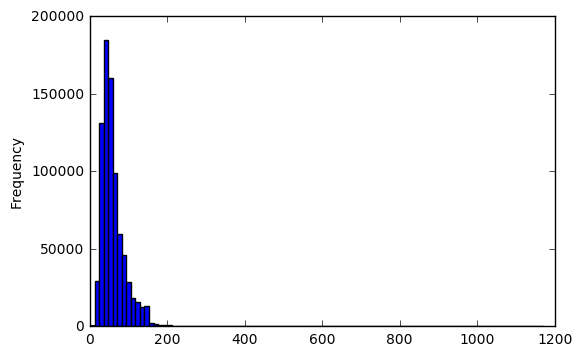

In [39]:
all_questions.str.len().plot('hist', bins=100)

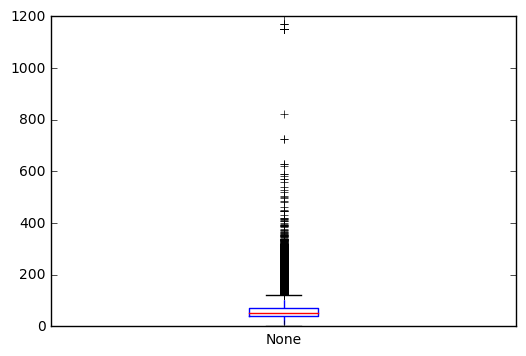

In [40]:
all_questions.str.len().plot('box')

# Same question

In [28]:
train.columns

Index(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [30]:
train.apply(lambda row: row['question1'] == row['question2'], axis=1).value_counts()

False    404290
dtype: int64

there is no equal pairs of questions

# Most frequent repeated questions

In [24]:
from nltk.probability import FreqDist

In [26]:
freqdist = FreqDist(all_questions)

freqdist.most_common(5)

[('What are the best ways to lose weight?', 161),
 ("How can you look at someone's private Instagram account without following them?",
  120),
 ('How can I lose weight quickly?', 111),
 ("What's the easiest way to make money online?", 88),
 ('Can you see who views your Instagram?', 79)]

# Vocabulary

In [4]:
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [5]:
text = ' '.join(all_questions)

tokenizer = RegexpTokenizer("[\w']+")
stops = stopwords.words('english')

freqdist = FreqDist(word for word in (word.lower() for word in tokenizer.tokenize(text)) if word not in stops)

freqdist.most_common(5)

[('best', 70581),
 ('get', 39541),
 ('india', 28908),
 ('people', 26123),
 ('like', 25644)]

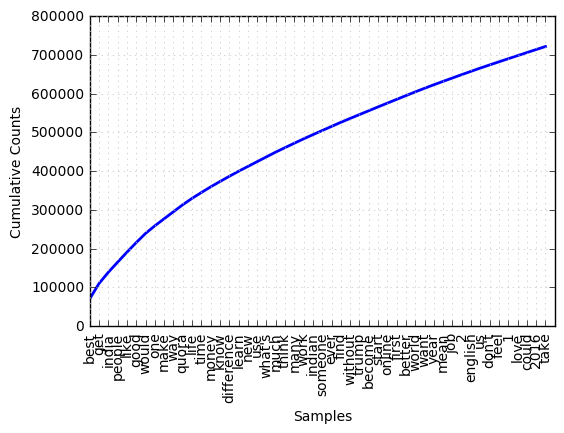

In [12]:
freqdist.plot(50, cumulative=True)